In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

first_df = pd.read_csv('First_Day_Dataset.csv')
last_df = pd.read_csv('Last_Day_Dataset.csv')

In [2]:
pct_df = first_df

In [3]:
pct_df['S&P'] = pct_df.loc[:,'^GSPC'].pct_change()
pct_df['EurAsia'] = pct_df.loc[:,'EFA'].pct_change()
pct_df['Real_Estate'] = pct_df.loc[:,'^FNAR'].pct_change()
pct_df['Commodity'] = pct_df.loc[:,'GD=F'].pct_change()


In [4]:
pct_df = pct_df.drop(['^GSPC', 'EFA', '^FNAR', 'GD=F'] , axis=1)

In [5]:
pct_df = pct_df.dropna()
pct_df


,Unnamed: 0,S&P,EurAsia,Real_Estate,Commodity
1,2012-03-01,0.037762,0.043807,-0.009725,0.079894
2,2012-04-02,0.032713,0.004522,0.038322,-0.015849
3,2012-05-01,-0.009316,-0.028093,0.034129,-0.019524
4,2012-06-01,-0.090894,-0.137484,-0.076239,-0.156250
5,2012-07-02,0.068441,0.105512,0.082808,0.031008
...,...,...,...,...,...
85,2020-08-03,0.057368,0.035352,0.001521,0.049428
86,2020-09-01,0.070430,0.028296,0.013770,0.046954
87,2020-10-01,-0.041356,-0.015834,-0.028864,-0.047209
88,2020-11-02,-0.020871,-0.028585,-0.024425,0.008015


In [6]:
pct_df = pct_df.drop(['Unnamed: 0'] , axis=1)
pct_df

,S&P,EurAsia,Real_Estate,Commodity
1,0.037762,0.043807,-0.009725,0.079894
2,0.032713,0.004522,0.038322,-0.015849
3,-0.009316,-0.028093,0.034129,-0.019524
4,-0.090894,-0.137484,-0.076239,-0.156250
5,0.068441,0.105512,0.082808,0.031008
...,...,...,...,...
85,0.057368,0.035352,0.001521,0.049428
86,0.070430,0.028296,0.013770,0.046954
87,-0.041356,-0.015834,-0.028864,-0.047209
88,-0.020871,-0.028585,-0.024425,0.008015


# Fixed-Mix Approach

In [7]:
DF_Fixed = []

In [9]:
#투자비중
W = [0.24295694, 0.69729744, 0.04978756, 0.00995805]
W

[0.24295694, 0.69729744, 0.04978756, 0.00995805]

In [10]:
# 투자 원금
Total = 1000000
first_port = []

sp500_start = W[0]*Total
EFA_start = W[1]*Total
RealEstate_start = W[2]*Total
Commodity_start = W[3]*Total
total_price = sp500_start+EFA_start+RealEstate_start+Commodity_start


first_port.append(sp500_start)
first_port.append(EFA_start)
first_port.append(RealEstate_start)
first_port.append(Commodity_start)
first_port.append(total_price)


DF_Fixed.append(first_port)
DF_Fixed

[[242956.94,
  697297.4400000001,
  49787.560000000005,
  9958.05,
  999999.9900000002]]

In [11]:
for i in range(len(pct_df)):
    current_sp = DF_Fixed[i][0]* (1+ (pct_df['S&P'].iloc[i]))
    current_EurAsia = DF_Fixed[i][1]* (1+ (pct_df['EurAsia'].iloc[i]))
    current_Real_Estate = DF_Fixed[i][2]* (1+ (pct_df['Real_Estate'].iloc[i]))
    current_Commodity = DF_Fixed[i][3]* (1+ (pct_df['Commodity'].iloc[i]))
    
    current_total_price = current_sp + current_EurAsia + current_Real_Estate + current_Commodity
    
    rebalance_SP=  current_total_price*W[0]
    rebalance_EurAsia= current_total_price*W[1]
    rebalance_RealEstate= current_total_price*W[2]
    rebalance_Commodity= current_total_price*W[3]
    
    rebalance_portfolio = []
    rebalance_portfolio.append(rebalance_SP)
    rebalance_portfolio.append(rebalance_EurAsia)
    rebalance_portfolio.append(rebalance_RealEstate)
    rebalance_portfolio.append(rebalance_Commodity)
    rebalance_portfolio.append(current_total_price)
    
    
    DF_Fixed.append(rebalance_portfolio)
                                   
DF_Fixed                                   

[[242956.94,
  697297.4400000001,
  49787.560000000005,
  9958.05,
  999999.9900000002],
 [252683.03419404713,
  725211.7715795299,
  51780.66420295783,
  10356.692377900506,
  1040032.172754757],
 [255930.34286931276,
  734531.6947978274,
  52446.113708159486,
  10489.789469729738,
  1053397.9513790088],
 [250722.74559797096,
  719585.6543766004,
  51378.95521660635,
  10276.346239798191,
  1031963.711750613],
 [219808.10918098257,
  630859.2453590321,
  45043.82309200437,
  9009.251357996538,
  904720.4380372199],
 [240609.212076336,
  690559.3543499773,
  49306.45563285125,
  9861.823927798718,
  990336.8558903318],
 [240396.23470157114,
  689948.0996222817,
  49262.811587018485,
  9853.09464701844,
  989460.2504524923],
 [254636.25243669725,
  730817.5965473666,
  52180.92430851002,
  10436.748724186487,
  1048071.5324974756],
 [256511.40675359115,
  736199.3745067657,
  52565.18728968526,
  10513.605472733556,
  1055789.5845806715],
 [258729.3420462506,
  742564.9494175178,
  5301

In [12]:
df_fixed = pd.DataFrame(
      DF_Fixed,
      columns=['sp', 'EurAsia', 'Real_Estate', 'Commodity','Total_Price'])
df_fixed

,sp,EurAsia,Real_Estate,Commodity,Total_Price
0,242956.940000,6.972974e+05,49787.560000,9958.050000,1.000000e+06
1,252683.034194,7.252118e+05,51780.664203,10356.692378,1.040032e+06
2,255930.342869,7.345317e+05,52446.113708,10489.789470,1.053398e+06
3,250722.745598,7.195857e+05,51378.955217,10276.346240,1.031964e+06
4,219808.109181,6.308592e+05,45043.823092,9009.251358,9.047204e+05
...,...,...,...,...,...
85,417561.260841,1.198420e+06,85568.069502,17114.538541,1.718664e+06
86,433426.640291,1.243954e+06,88819.256857,17764.811145,1.783965e+06
87,423459.538434,1.215348e+06,86776.764547,17356.290611,1.742941e+06
88,412390.681215,1.183580e+06,84508.496791,16902.612550,1.697382e+06


## 수익률

In [13]:
Return = df_fixed.loc[:,'Total_Price'].pct_change()
Return = Return.dropna()
Return

1     0.040032
2     0.012851
3    -0.020348
4    -0.123302
5     0.094633
        ...   
85    0.039157
86    0.037995
87   -0.022996
88   -0.026139
89    0.139578
Name: Total_Price, Length: 89, dtype: float64

## Variance

In [14]:
df_1 = df_fixed.loc[:,'sp'].pct_change()
df_2 = df_fixed.loc[:,'EurAsia'].pct_change()
df_3 = df_fixed.loc[:,'Real_Estate'].pct_change()
df_4 = df_fixed.loc[:,'Commodity'].pct_change()

df_fixed_return = pd.concat([df_1,df_2,df_3,df_4], axis=1)
df_fixed_return = df_fixed_return.dropna()
df_fixed_return

,sp,EurAsia,Real_Estate,Commodity
1,0.040032,0.040032,0.040032,0.040032
2,0.012851,0.012851,0.012851,0.012851
3,-0.020348,-0.020348,-0.020348,-0.020348
4,-0.123302,-0.123302,-0.123302,-0.123302
5,0.094633,0.094633,0.094633,0.094633
...,...,...,...,...
85,0.039157,0.039157,0.039157,0.039157
86,0.037995,0.037995,0.037995,0.037995
87,-0.022996,-0.022996,-0.022996,-0.022996
88,-0.026139,-0.026139,-0.026139,-0.026139


In [15]:
Variance = []

for i in range(2,len(df_fixed_return)+2):
    covariance = df_fixed_return.iloc[:i,:].cov()    
    
    current_Var = 0
    for i in range(4):
        for j in range(4):
            current_Var += W[i] * W[j] * covariance.iloc[i, j]
    Variance.append(current_Var)        

    
len(Variance)

89

## Sharp Ratio

In [16]:
sharp = []
risk_free_rate = 0.01
for i in range(1,len(Return)+1):
    sharp_each = (Return[i] - risk_free_rate)/np.sqrt(Variance[i-1])
    sharp.append(sharp_each)
    
len(sharp)

89

## MDD

In [17]:
Total_Price = df_fixed.loc[:,'Total_Price']
Total_Price

0     1.000000e+06
1     1.040032e+06
2     1.053398e+06
3     1.031964e+06
4     9.047204e+05
          ...     
85    1.718664e+06
86    1.783965e+06
87    1.742941e+06
88    1.697382e+06
89    1.934298e+06
Name: Total_Price, Length: 90, dtype: float64

In [18]:
MDD = []
for i in range(1,len(Total_Price)):
    minimum = min(Total_Price[:i+1])
    maximum = max(Total_Price[:i+1])
                  
    current_MDD = (minimum-maximum)/maximum
    MDD.append(current_MDD)
    
len(MDD)

89

In [19]:
Eval_Fixed = pd.DataFrame(
    {"Return": Return,
    "Variance": Variance,
    "Sharp_ratio": sharp,
    "MDD": MDD})
Eval_Fixed

,Return,Variance,Sharp_ratio,MDD
1,0.040032,0.000369,1.562567,-0.038491
2,0.012851,0.000914,0.094290,-0.050691
3,-0.020348,0.005109,-0.424599,-0.050691
4,-0.123302,0.006584,-1.642778,-0.141141
5,0.094633,0.005268,1.166052,-0.141141
...,...,...,...,...
85,0.039157,0.002111,0.634565,-0.495226
86,0.037995,0.002098,0.611267,-0.495226
87,-0.022996,0.002086,-0.722398,-0.495226
88,-0.026139,0.002260,-0.760232,-0.495226


In [22]:
print("Return의 mean: ", Eval_Fixed['Return'].mean())
print("Variance의 mean: ", Eval_Fixed['Variance'].mean())
print("Sharp_ratio의 mean: ", Eval_Fixed['Sharp_ratio'].mean())
print("MDD의 mean: ", Eval_Fixed['MDD'].mean())


Return의 mean:  0.00858861141807287
Variance의 mean:  0.002110065346961815
Sharp_ratio의 mean:  -0.02480580713081811
MDD의 mean:  -0.3745125680085302


<AxesSubplot: >

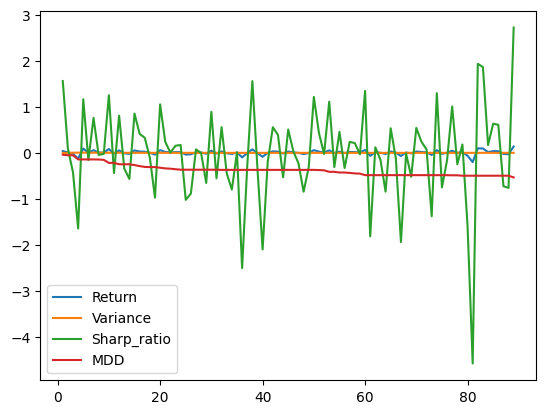

In [28]:
Eval_Fixed.plot()